# Assessment

We would like to study correlations. In order to study them, we use a basic visualization tool -- the heatmap. Use the the heatmap to understand correlations between features in the Pima Indians Diabetes dataset which contains information on  female patients all at least 21 years of age and of Pima Indian heritage. The population lives near Phoenix, Arizona, USA. The data set was collected to forecast the onset of diabetes mellitus. The following is the information the columns in the dataset:
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1), i.e., (class value 1 is interpreted as "tested positive for diabetes")

## The dataset has no column headings so use the information given about the columns above to create column headings.

In [1]:
#Import libraries that may be useful
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load, read, and name the columns of the data set as dataframe
df = pd.read_csv("pima-indians-diabetes.csv", sep = ',', names = ['Number of Pregnancy','Glucose concentration','Blood pressure', 'Skin thickness', 'Insulin', 'Body mass index', 'Diabetes pedigree function', 'Age', 'Class variable'])
df

,Number of Pregnancy,Glucose concentration,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Find any missing values in the data.

In [3]:
# Let us have a look at the five prime rows value of the dataframe
df.head()

,Number of Pregnancy,Glucose concentration,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Let us have a look at the five last rows value of the dataframe
df.tail()

,Number of Pregnancy,Glucose concentration,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Class variable
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Looking at those values, I may tend to think that if there are invalid or missing values they should be represent by the value 0. 

In [5]:
# Let check if there are missing value by counting them:
df.isnull().sum()

Number of Pregnancy           0
Glucose concentration         0
Blood pressure                0
Skin thickness                0
Insulin                       0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class variable                0
dtype: int64

There is not any missing value in the dataframe. 

In [6]:
# Check if there are invalid value and replace them:
#df.replace(0, np.NaN)
df.describe()

,Number of Pregnancy,Glucose concentration,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let us check if there are not outlier.

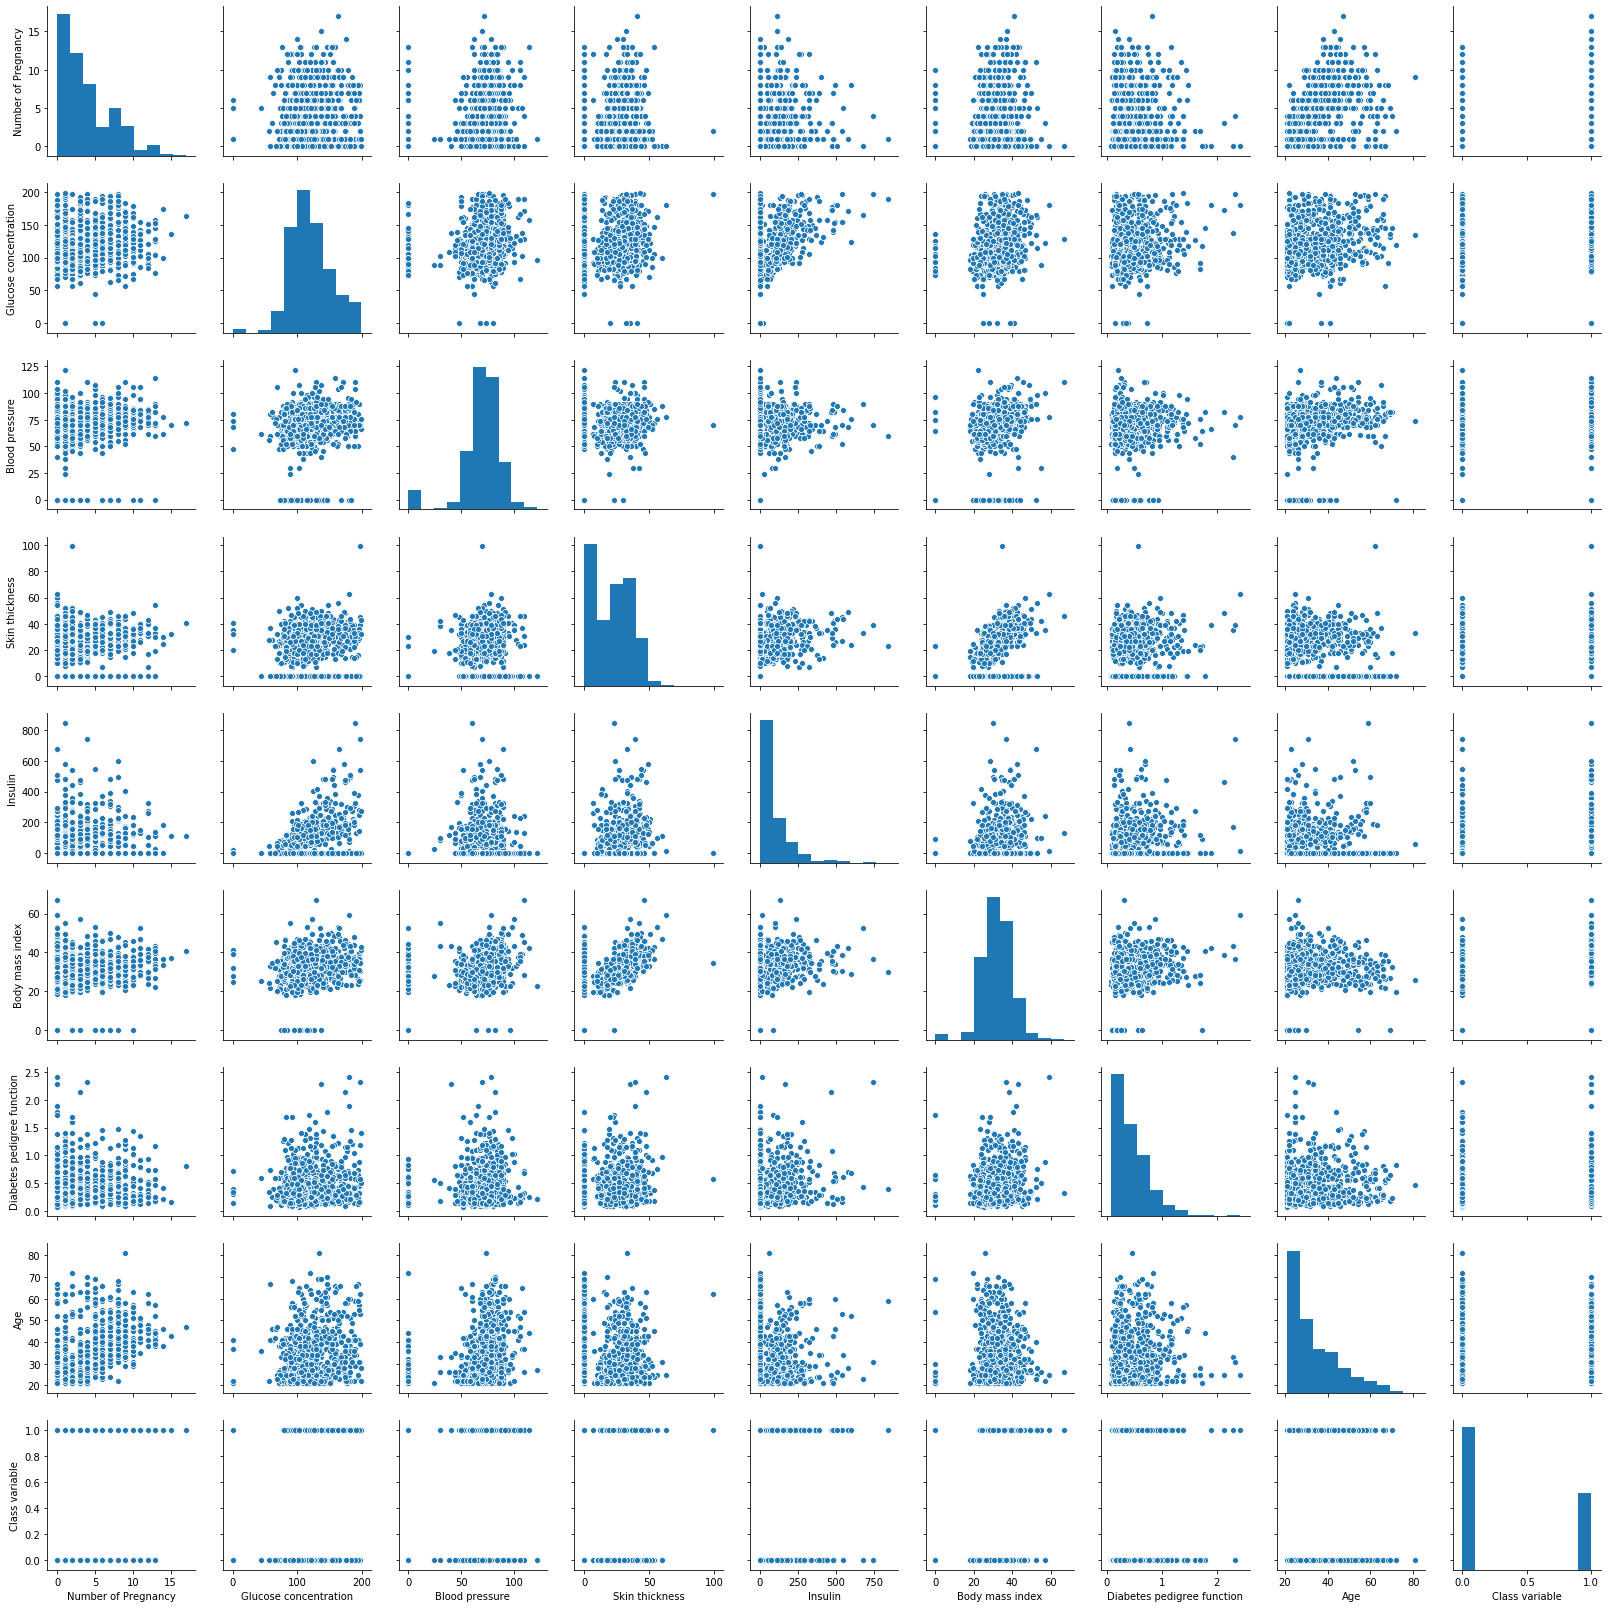

In [7]:
sns.pairplot(df)

## Visualize the correlation matrix

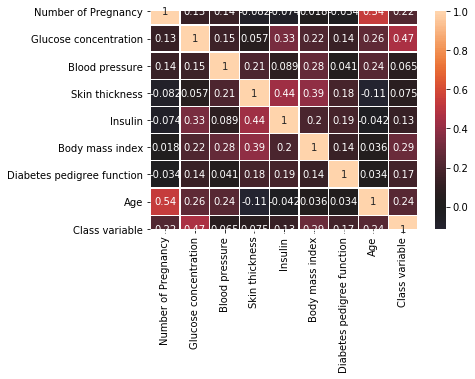

In [8]:
matrix_corr = df.corr()
sns.heatmap(matrix_corr, center = 0, annot = True, linewidths=.3)

## Interpreting the results

Notice that 'Class' is a categorical variable. Let's drop it for now.

In [9]:
df = df.drop('Class variable', axis=1)
df

,Number of Pregnancy,Glucose concentration,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Now let's find those features that are highly correlated. Visually pick out the highly correlated features or write code to find the highly correlated features.

In [10]:
matrix_corr = df.corr()
#Correlation with output variable
matrix_corr = abs(matrix_corr["Number of Pregnancy"])

#Selecting highly correlated features
relevant_features = matrix_corr[matrix_corr>0.5]
relevant_features

Number of Pregnancy    1.000000
Age                    0.544341
Name: Number of Pregnancy, dtype: float64

Using the above code, you identified sets of features that are highly correlated. Plot them using a scatterplot and discuss your findings.

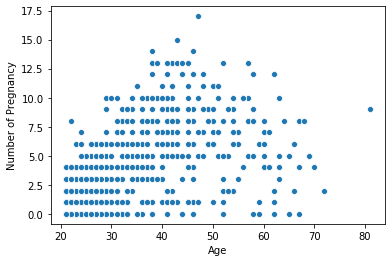

In [11]:
sns.scatterplot(df['Age'], df['Number of Pregnancy'])